In [4]:
# import required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#  load data
data = pd.read_csv('E:\\JUPYTER\\Data Science\\Project 2\\amazon.csv', encoding = "iso-8859-1", parse_dates = ['date'])

In [11]:
# display data
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [12]:
# display datatypes
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [15]:
# display top 5 rows of the dataset
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [16]:
# display last 5 rows of the dataset
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [18]:
# find number of rows and number of columns
data.shape

(6454, 5)

In [19]:
# getting information about out dataset like total number of rows, total number of columns, datatypes of each columns and memory requirements
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [21]:
# check for duplicate data and drop them
dup_data = data.duplicated().any()
dup_data

np.True_

In [23]:
data = data.drop_duplicates()
data.shape

(6422, 5)

In [26]:
# check null value in the dataset
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [27]:
# get overall statistics about the dataframe
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [29]:
# rename month names to english
data.head()
data['month_new'] = data['month'].map({'Janeiro':'January',
                                       'Fevereiro':'February',
                                       'Marco':'March',
                                       'Abril':'April',
                                       'Maio':'May',
                                       'Junho':'June',
                                       'Julho':'July',
                                       'Agosto':'August',
                                       'Setembro':'September',
                                       'Outubro':'October',
                                       'Novembro':'November',
                                       'Dezembro':'December'})
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [30]:
# total number of fires registered
data.shape

(6422, 6)

In [31]:
# in which month maximum number of forest fires were reported
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [40]:
data.groupby('month_new')['number'].sum()

month_new
April        28184.770
August       88050.435
December     57535.480
February     30839.050
January      47681.844
July         92319.113
June         55997.675
May          34725.363
November     85508.054
October      88681.579
September    58578.305
Name: number, dtype: float64

<Axes: xlabel='month_new', ylabel='number'>

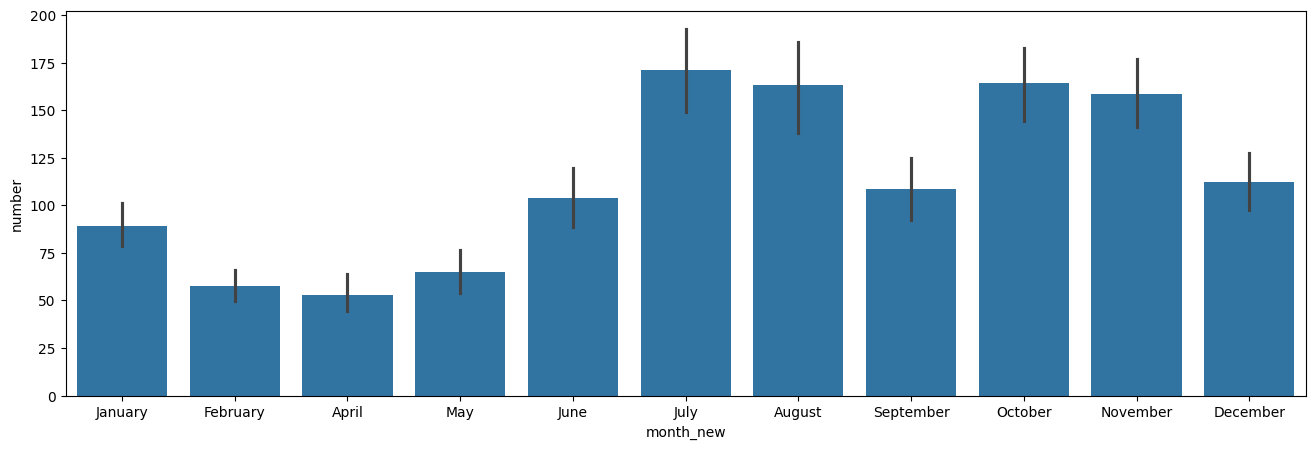

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new", y="number", data=data)

In [42]:
# in which year maximum number of forest fires were reported
data.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

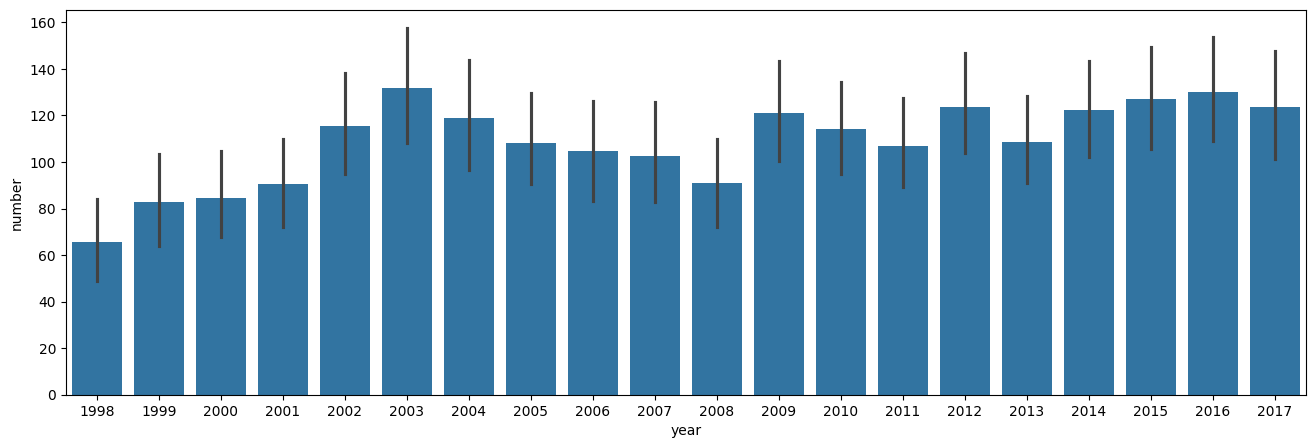

In [43]:
plt.figure(figsize=(16,5))
sns.barplot(x="year", y="number", data=data)

In [44]:
# in which state maximum number of forest fires were reported
data.groupby('state')['number'].sum().reset_index()

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


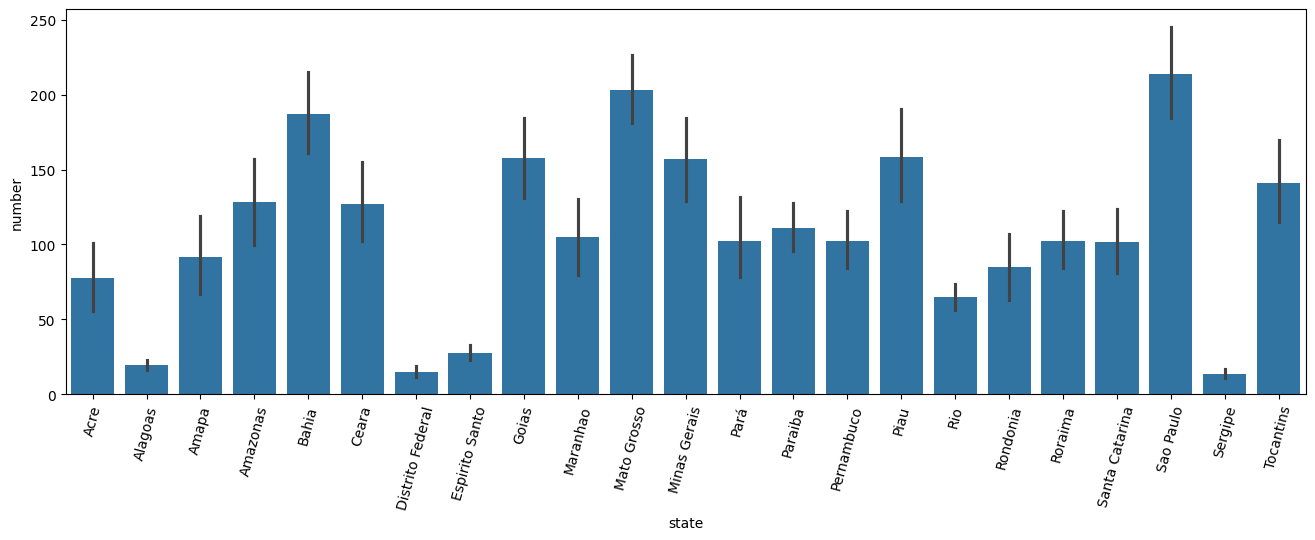

In [52]:
plt.figure(figsize=(16,5))
sns.barplot(x="state", y="number", data=data)
plt.xticks(rotation=75)
plt.show()

In [56]:
# find total numbers of fires reported in Amazonas
data[data['state']=="Amazonas"]['number'].sum()

np.float64(30650.129)

In [58]:
# display number of fires reported in Amazonas year wise
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [64]:
# Filter rows where state is 'Amazonas'
data1 = data[data['state'] == "Amazonas"]

# Group by 'year' and sum the 'number' column
data2 = data1.groupby('year', as_index=False)['number'].sum()

# Display the result
print(data2)


    year    number
0   1998   946.000
1   1999  1061.000
2   2000   853.000
3   2001  1297.000
4   2002  2852.000
5   2003  1524.268
6   2004  2298.207
7   2005  1657.128
8   2006   997.640
9   2007   589.601
10  2008  2717.000
11  2009  1320.601
12  2010  2324.508
13  2011  1652.538
14  2012  1110.641
15  2013   905.217
16  2014  2385.909
17  2015  1189.994
18  2016  2060.972
19  2017   906.905


<Axes: xlabel='year', ylabel='number'>

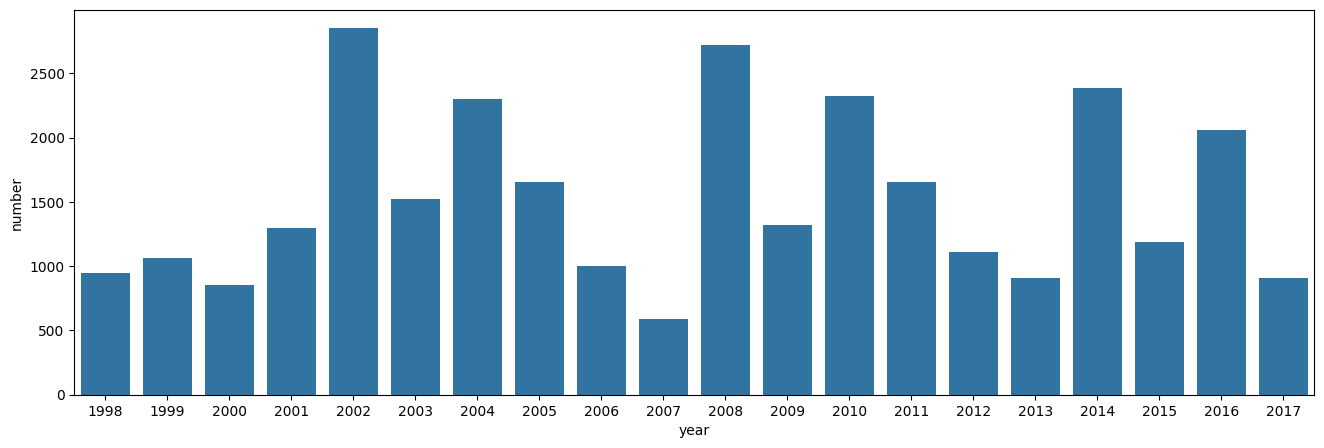

In [66]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)

In [67]:
# display number of fires reported in Amazonas year wise
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [77]:
# Ensure the 'date' column is a datetime object
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Filter rows where state is 'Amazonas'
data1 = data[data['state'] == "Amazonas"]

# Group by the day of the week and sum only numeric columns
result = data1.groupby(data1['date'].dt.dayofweek).sum(numeric_only=True)

# Optionally map day indices to day names
result.index = result.index.map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Display the result
print(result)
import calendar
day = [calendar.day_name[x] for x in range(0,7)]
day


            year    number
date                      
Monday     48096  1886.601
Tuesday    72276  6474.217
Wednesday  48204  3910.177
Thursday   96312  5754.802
Friday     72300  5446.480
Saturday   72192  4162.666
Sunday     70403  3015.186


['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']